# Задание 1.1 - Метод К-ближайших соседей (K-neariest neighbor classifier)

В первом задании вы реализуете один из простейших алгоритмов машинного обучения - классификатор на основе метода K-ближайших соседей.
Мы применим его к задачам
- бинарной классификации (то есть, только двум классам)
- многоклассовой классификации (то есть, нескольким классам)

Так как методу необходим гиперпараметр (hyperparameter) - количество соседей, мы выберем его на основе кросс-валидации (cross-validation).

Наша основная задача - научиться пользоваться numpy и представлять вычисления в векторном виде, а также ознакомиться с основными метриками, важными для задачи классификации.

Перед выполнением задания:
- запустите файл `download_data.sh`, чтобы скачать данные, которые мы будем использовать для тренировки
- установите все необходимые библиотеки, запустив `pip install -r requirements.txt` (если раньше не работали с `pip`, вам сюда - https://pip.pypa.io/en/stable/quickstart/)

Если вы раньше не работали с numpy, вам может помочь tutorial. Например этот:  
http://cs231n.github.io/python-numpy-tutorial/

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
from dataset import load_svhn
from knn import KNN
from metrics import binary_classification_metrics, multiclass_accuracy

# Загрузим и визуализируем данные

В задании уже дана функция `load_svhn`, загружающая данные с диска. Она возвращает данные для тренировки и для тестирования как numpy arrays.

Мы будем использовать цифры из датасета Street View House Numbers (SVHN, http://ufldl.stanford.edu/housenumbers/), чтобы решать задачу хоть сколько-нибудь сложнее MNIST.

In [3]:
train_X, train_y, test_X, test_y = load_svhn("data", max_train=1000, max_test=100)

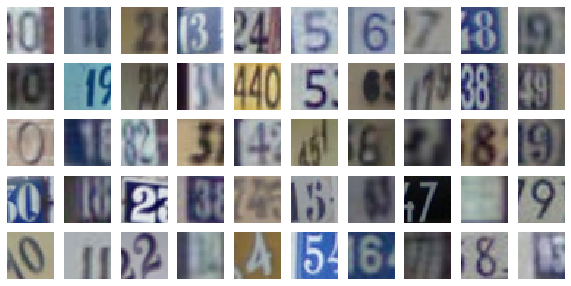

In [4]:
plt.figure(figsize=(10, 5))

samples_per_class = 5  # Number of samples per class to visualize
plot_index = 1
for example_index in range(samples_per_class):
    for class_index in range(10):
        plt.subplot(5, 10, plot_index)
        image = train_X[train_y == class_index][example_index]
        plt.imshow(image.astype(np.uint8))
        plt.axis('off')
        plot_index += 1

# Сначала реализуем KNN для бинарной классификации

В качестве задачи бинарной классификации мы натренируем модель, которая будет отличать цифру 0 от цифры 9.

In [5]:
# First, let's prepare the labels and the source data

# Only select 0s and 9s
binary_train_mask = (train_y == 0) | (train_y == 9)
binary_train_X = train_X[binary_train_mask]
binary_train_y = train_y[binary_train_mask] == 0

binary_test_mask = (test_y == 0) | (test_y == 9)
binary_test_X = test_X[binary_test_mask]
binary_test_y = test_y[binary_test_mask] == 0

# Reshape to 1-dimensional array [num_samples, 32*32*3]
binary_train_X = binary_train_X.reshape(binary_train_X.shape[0], -1)
binary_test_X = binary_test_X.reshape(binary_test_X.shape[0], -1)

In [6]:
# Create the classifier and call fit to train the model
# KNN just remembers all the data
knn_classifier = KNN(k=1)
knn_classifier.fit(binary_train_X, binary_train_y)

## Пришло время написать код! 

Последовательно реализуйте функции `compute_distances_two_loops`, `compute_distances_one_loop` и `compute_distances_no_loops`
в файле `knn.py`.

Эти функции строят массив расстояний между всеми векторами в тестовом наборе и в тренировочном наборе.  
В результате они должны построить массив размера `(num_test, num_train)`, где координата `[i][j]` соотвествует расстоянию между i-м вектором в test (`test[i]`) и j-м вектором в train (`train[j]`).

**Обратите внимание** Для простоты реализации мы будем использовать в качестве расстояния меру L1 (ее еще называют [Manhattan distance](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D1%81%D0%BA%D0%B8%D1%85_%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B0%D0%BB%D0%BE%D0%B2)).

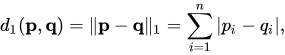

In [7]:
dists = knn_classifier.compute_distances_two_loops(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))

In [8]:
dists = knn_classifier.compute_distances_one_loop(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))

In [9]:
dists = knn_classifier.compute_distances_no_loops(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))

In [10]:
# Lets look at the performance difference
%timeit knn_classifier.compute_distances_two_loops(binary_test_X)
%timeit knn_classifier.compute_distances_one_loop(binary_test_X)
%timeit knn_classifier.compute_distances_no_loops(binary_test_X)

55.6 ms ± 1.32 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
18.5 ms ± 474 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
34.3 ms ± 104 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [11]:
prediction = knn_classifier.predict(binary_test_X)

In [12]:
precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("KNN with k = %s" % knn_classifier.k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

KNN with k = 1
Accuracy: 0.56, Precision: 0.73, Recall: 0.67, F1: 0.70


In [13]:
# Let's put everything together and run KNN with k=3 and see how we do
knn_classifier_3 = KNN(k=3)
knn_classifier_3.fit(binary_train_X, binary_train_y)
prediction = knn_classifier_3.predict(binary_test_X)

precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("KNN with k = %s" % knn_classifier_3.k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

KNN with k = 3
Accuracy: 0.56, Precision: 0.73, Recall: 0.67, F1: 0.70


In [14]:
# Test binary metrics
outputs = np.array([1, 0, 0, 1, 0])
targets = np.array([0, 0, 1, 1, 1])

true_metrics = {'accuracy': 2 / 5, 'precision': 1 / 2, 'recall': 1 / 3, 'f1': 2 / 5}

precision, recall, f1, accuracy = binary_classification_metrics(outputs, targets)
assert precision == true_metrics['precision']
assert recall == true_metrics['recall']
assert f1 == true_metrics['f1']
assert accuracy == true_metrics['accuracy']

# Кросс-валидация (cross-validation)

Попробуем найти лучшее значение параметра k для алгоритма KNN! 

Для этого мы воспользуемся k-fold cross-validation (https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation). Мы разделим тренировочные данные на 5 фолдов (folds), и по очереди будем использовать каждый из них в качестве проверочных данных (validation data), а остальные -- в качестве тренировочных (training data).

В качестве финальной оценки эффективности k мы усредним значения F1 score на всех фолдах.
После этого мы просто выберем значение k с лучшим значением метрики.

*Бонус*: есть ли другие варианты агрегировать F1 score по всем фолдам? Напишите плюсы и минусы в клетке ниже.

In [15]:
# Find the best k using cross-validation based on F1 score
num_folds = 5
train_folds_X = []
train_folds_y = []

# Shuffle the indices
num_train_samples = binary_train_X.shape[0]
indices = np.arange(num_train_samples)
np.random.shuffle(indices)

# Calculate fold sizes
default_fold_size = int(num_train_samples / num_folds)
fold_sizes = [default_fold_size] * num_folds
for i in range(num_train_samples % num_folds):
    fold_sizes[i] += 1

# Split the training data in 5 folds and store them in train_folds_X/train_folds_y
start = 0
for i in range(num_folds):
    fold_indices = indices[start:start+fold_sizes[i]]
    start += fold_sizes[i]
    
    train_folds_X.append(binary_train_X[fold_indices, :])
    train_folds_y.append(binary_train_y[fold_indices])

k_choices = [1, 2, 3, 5, 8, 10, 15, 20, 25, 50]
k_to_f1 = {}  # dict mapping k values to mean F1 scores (int -> float)

for k in k_choices:
    # Perform cross-validation
    knn_classifier = KNN(k=k)
    f1 = np.zeros((num_folds,))
    
    for i in range(num_folds):
        # Go through every fold and use it for testing and all other folds for training
        X_val = train_folds_X[i]
        y_val = train_folds_y[i]
        
        X_train = np.vstack([train_folds_X[j] for j in range(num_folds) if j != i])
        y_train = np.hstack([train_folds_y[j] for j in range(num_folds) if j != i])
        
        # Perform training and produce F1 score metric on the validation dataset
        knn_classifier.fit(X_train, y_train)
        prediction = knn_classifier.predict(X_val)
        _, _, f1[i], _ = binary_classification_metrics(prediction, y_val)
        
    # Average F1 from all the folds and write it into k_to_f1
    k_to_f1[k] = np.mean(f1)

for k in sorted(k_to_f1):
    print('k = %d, f1 = %f' % (k, k_to_f1[k]))

k = 1, f1 = 0.630535
k = 2, f1 = 0.698173
k = 3, f1 = 0.651467
k = 5, f1 = 0.655090
k = 8, f1 = 0.694953
k = 10, f1 = 0.667430
k = 15, f1 = 0.649707
k = 20, f1 = 0.701908
k = 25, f1 = 0.628922
k = 50, f1 = 0.656670


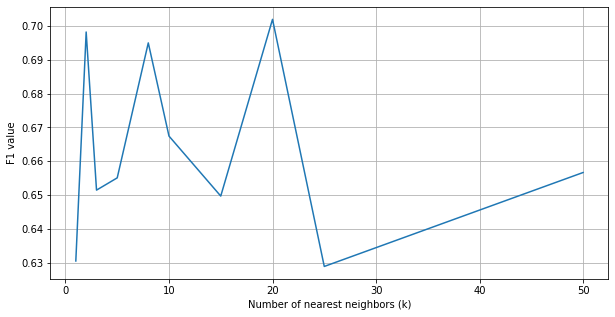

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 5))
plt.plot(k_choices, list(k_to_f1.values()))
plt.xlabel('Number of nearest neighbors (k)')
plt.ylabel('F1 value')
plt.grid(True)

### Проверим, как хорошо работает лучшее значение k на тестовых данных (test data)

In [17]:
# Set the best k to the best value found by cross-validation
best_k = 20

best_knn_classifier = KNN(k=best_k)
best_knn_classifier.fit(binary_train_X, binary_train_y)
prediction = best_knn_classifier.predict(binary_test_X)

precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("Best KNN with k = %s" % best_k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

Best KNN with k = 20
Accuracy: 0.62, Precision: 0.71, Recall: 0.83, F1: 0.77


# Многоклассовая классификация (multi-class classification)

Переходим к следующему этапу - классификации на каждую цифру.

In [18]:
# Now let's use all 10 classes
train_X = train_X.reshape(train_X.shape[0], -1)
test_X = test_X.reshape(test_X.shape[0], -1)

knn_classifier = KNN(k=1)
knn_classifier.fit(train_X, train_y)

In [19]:
predict = knn_classifier.predict(test_X)

In [20]:
accuracy = multiclass_accuracy(predict, test_y)
print("Accuracy: %4.2f" % accuracy)

Accuracy: 0.21


Снова кросс-валидация. Теперь нашей основной метрикой стала точность (accuracy), и ее мы тоже будем усреднять по всем фолдам.

In [21]:
# Find the best k using cross-validation based on accuracy
num_folds = 5
train_folds_X = []
train_folds_y = []

# Shuffle the indices
num_train_samples = binary_train_X.shape[0]
indices = np.arange(num_train_samples)
np.random.shuffle(indices)

# Calculate fold sizes
default_fold_size = int(num_train_samples / num_folds)
fold_sizes = [default_fold_size] * num_folds
for i in range(num_train_samples % num_folds):
    fold_sizes[i] += 1

# Split the training data in 5 folds and store them in train_folds_X/train_folds_y
start = 0
for i in range(num_folds):
    fold_indices = indices[start:start+fold_sizes[i]]
    start += fold_sizes[i]
    
    train_folds_X.append(binary_train_X[fold_indices, :])
    train_folds_y.append(binary_train_y[fold_indices])

k_choices = [1, 2, 3, 5, 8, 10, 15, 20, 25, 50]
k_to_accuracy = {}

for k in k_choices:
    # Perform cross-validation
    knn_classifier = KNN(k=k)
    accuracy = np.zeros((num_folds,))
    
    for i in range(num_folds):
        # Go through every fold and use it for testing and all other folds for training
        X_val = train_folds_X[i]
        y_val = train_folds_y[i]
        
        X_train = np.vstack([train_folds_X[j] for j in range(num_folds) if j != i])
        y_train = np.hstack([train_folds_y[j] for j in range(num_folds) if j != i])
        
        # Perform training and produce accuracy metric on the validation dataset
        knn_classifier.fit(X_train, y_train)
        prediction = knn_classifier.predict(X_val)
        _, _, _, accuracy[i] = binary_classification_metrics(prediction, y_val)
        
    # Average accuracy from all the folds and write it into k_to_accuracy
    k_to_accuracy[k] = np.mean(accuracy)

for k in sorted(k_to_accuracy):
    print('k = %d, accuracy = %f' % (k, k_to_accuracy[k]))

k = 1, accuracy = 0.553000
k = 2, accuracy = 0.545333
k = 3, accuracy = 0.562000
k = 5, accuracy = 0.512000
k = 8, accuracy = 0.553333
k = 10, accuracy = 0.561000
k = 15, accuracy = 0.520667
k = 20, accuracy = 0.545000
k = 25, accuracy = 0.536667
k = 50, accuracy = 0.470667


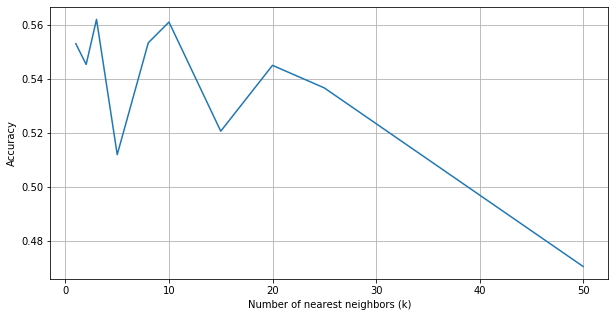

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(k_choices, list(k_to_accuracy.values()))
plt.xlabel('Number of nearest neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)

### Финальный тест - классификация на 10 классов на тестовой выборке (test data)

Если все реализовано правильно, вы должны увидеть точность не менее **0.2**.

In [23]:
# Set the best k as a best from computed
best_k = 10

best_knn_classifier = KNN(k=best_k)
best_knn_classifier.fit(train_X, train_y)
prediction = best_knn_classifier.predict(test_X)

# Accuracy should be around 20%!
accuracy = multiclass_accuracy(prediction, test_y)
print("Accuracy: %4.2f" % accuracy)

Accuracy: 0.21
